In [23]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten #importing required libraries
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
width, height= 224, 224
img = cv2.imread('/content/drive/MyDrive/images/jeans/jean100.jpg')
img_resized = cv2.resize(img,(width, height))

In [4]:
img_resized.shape

(224, 224, 3)

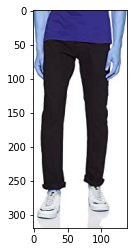

In [5]:
plt.imshow(img)

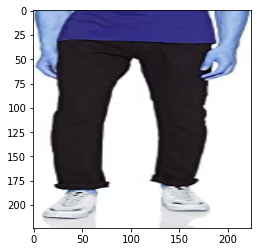

In [6]:
plt.imshow(img_resized)

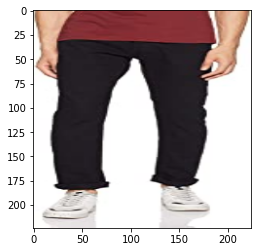

In [7]:
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

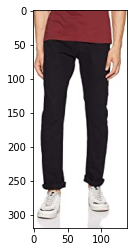

In [8]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [39]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/images',
                                                 target_size = (width, height),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 602 images belonging to 3 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test images',
                                            target_size = (width, height),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 15 images belonging to 3 classes.


In [40]:
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/images/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
folders

['/content/drive/MyDrive/images/sarees',
 '/content/drive/MyDrive/images/jeans',
 '/content/drive/MyDrive/images/trousers']

In [41]:
# fit the model
r = model.fit( training_set,validation_data=test_set,epochs=10)


Epoch 1/10
19/19 [==============================] - 277s 15s/step - loss: 0.6850 - accuracy: 0.7093 - val_loss: 0.5321 - val_accuracy: 0.8000
Epoch 2/10
19/19 [==============================] - 275s 14s/step - loss: 0.2957 - accuracy: 0.8621 - val_loss: 0.4847 - val_accuracy: 0.8000
Epoch 3/10
19/19 [==============================] - 275s 14s/step - loss: 0.2383 - accuracy: 0.8937 - val_loss: 0.2196 - val_accuracy: 0.8667
Epoch 4/10
19/19 [==============================] - 275s 14s/step - loss: 0.2097 - accuracy: 0.9269 - val_loss: 0.0972 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 275s 14s/step - loss: 0.1607 - accuracy: 0.9402 - val_loss: 0.0772 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 275s 14s/step - loss: 0.1287 - accuracy: 0.9568 - val_loss: 0.1094 - val_accuracy: 0.9333
Epoch 7/10
19/19 [==============================] - 275s 14s/step - loss: 0.1128 - accuracy: 0.9651 - val_loss: 0.0822 - val_accuracy: 1.0000
Epoch 

model is trainded with accuracy 97.5% and validation accuracy at 93% with minimum loss

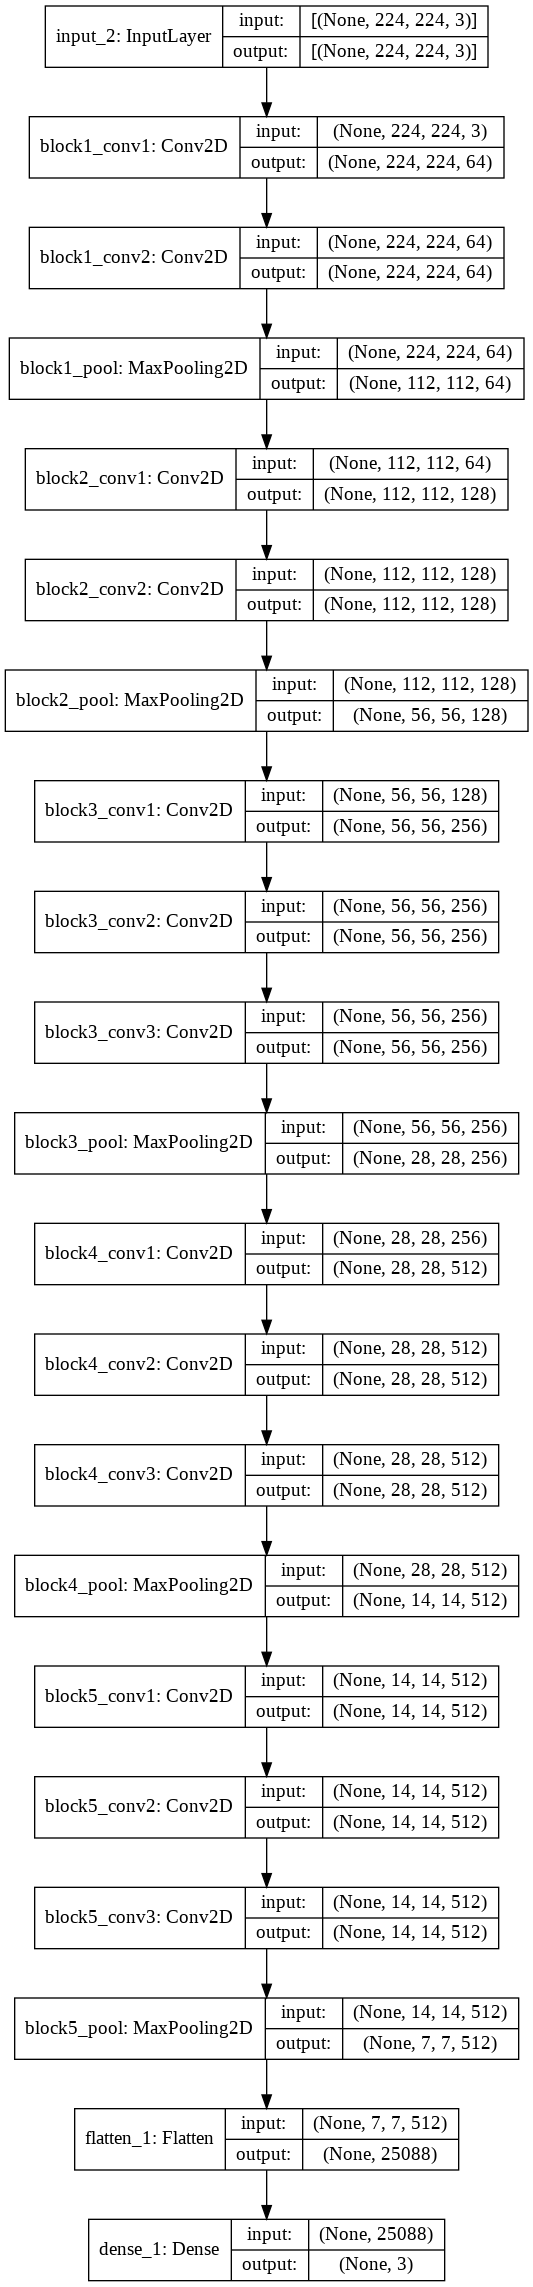

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True, show_layer_names=True)